In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE 
ada=SMOTE()

heart="sobar-72.csv"
data=pd.read_csv (heart)

data=data.astype(float)

x=data.drop('ca_cervix',axis=1)
y=data['ca_cervix']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=15, stratify=y)

from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

x_train,y_train = ada.fit_resample(x_train,y_train)

x=x_train
y=y_train

y_train.size

80

In [2]:
data.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [4]:
model=DecisionTreeClassifier()
model.fit(x,y)
y_pred=model.predict(x_test)
met = confusion_matrix(y_test, y_pred)
print(met)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("DecisionTree accuracy:",acc)
print("DecisionTree precision:",pr)
print("DecisionTree recall:",rec)
print("DecisionTree f1 score:",f1)

print("DecisionTree accuracy:",accuracy_score(y_test, y_pred))
print("DecisionTree precision:",precision_score(y_test, y_pred))
print("DecisionTree recall:",recall_score(y_test, y_pred))
print("DecisionTree f1 score:",f1_score(y_test, y_pred))

[[9 2]
 [0 4]]
DecisionTree accuracy: 0.8666666666666667
DecisionTree precision: 0.8181818181818182
DecisionTree recall: 1.0
DecisionTree f1 score: 0.9
DecisionTree accuracy: 0.8666666666666667
DecisionTree precision: 0.6666666666666666
DecisionTree recall: 1.0
DecisionTree f1 score: 0.8


In [126]:
model1=RandomForestClassifier()
model1.fit(x,y)
y1_pred=model1.predict(x_test)
met = confusion_matrix(y_test, y1_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("RFC accuracy:",acc)
print("RFC precision:",pr)
print("RFC recall:",rec)
print("RFC f1 score:",f1)

[[10  1]
 [ 0  4]]
RFC accuracy: 0.9333333333333333
RFC precision: 0.9090909090909091
RFC recall: 1.0
RFC f1 score: 0.9523809523809523


In [128]:
model2=GaussianNB()
model2.fit(x,y)
y2_pred=model2.predict(x_test)
met = confusion_matrix(y_test, y2_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("GNB accuracy:",acc)
print("GNB precision:",pr)
print("GNB recall:",rec)
print("GNB f1 score:",f1)

[[9 2]
 [0 4]]
GNB accuracy: 0.8666666666666667
GNB precision: 0.8181818181818182
GNB recall: 1.0
GNB f1 score: 0.9


In [129]:
model4=KNeighborsClassifier()
model4.fit(x,y)
y4_pred=model.predict(x_test)
met = confusion_matrix(y_test, y4_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("KNN accuracy:",acc)
print("KNN precision:",pr)
print("KNN recall:",rec)
print("KNN f1 score:",f1)

[[9 2]
 [0 4]]
KNN accuracy: 0.8666666666666667
KNN precision: 0.8181818181818182
KNN recall: 1.0
KNN f1 score: 0.9


In [130]:
model5=SVC()
model5.fit(x,y)
y5_pred=model5.predict(x_test)
met = confusion_matrix(y_test, y5_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("SVC accuracy:",acc)
print("SVC precision:",pr)
print("SVC recall:",rec)
print("SVC f1 score:",f1)

[[10  1]
 [ 0  4]]
SVC accuracy: 0.9333333333333333
SVC precision: 0.9090909090909091
SVC recall: 1.0
SVC f1 score: 0.9523809523809523


In [133]:
model6=CatBoostClassifier(silent=True)
model6.fit(x,y)
y6_pred=model6.predict(x_test)
met = confusion_matrix(y_test, y6_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("catboost accuracy:",acc)
print("catboost precision:",pr)
print("catboost recall:",rec)
print("catboost f1 score:",f1)

[[9 2]
 [0 4]]
catboost accuracy: 0.8666666666666667
catboost precision: 0.8181818181818182
catboost recall: 1.0
catboost f1 score: 0.9


In [135]:
from sklearn.neural_network import MLPClassifier

model7=MLPClassifier()
model7.fit(x,y)
y7_pred=model7.predict(x_test)
met = confusion_matrix(y_test, y7_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("MLPClassifier accuracy:",acc)
print("MLPClassifier precision:",pr)
print("MLPClassifier recall:",rec)
print("MLPClassifier f1 score:",f1)

[[9 2]
 [0 4]]
MLPClassifier accuracy: 0.8666666666666667
MLPClassifier precision: 0.8181818181818182
MLPClassifier recall: 1.0
MLPClassifier f1 score: 0.9


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
from sklearn.ensemble import GradientBoostingClassifier

model8=GradientBoostingClassifier()
model8.fit(x,y)
y8_pred=model8.predict(x_test)
met = confusion_matrix(y_test, y8_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("GradientBoostingClassifier accuracy:",acc)
print("GradientBoostingClassifier precision:",pr)
print("GradientBoostingClassifier recall:",rec)
print("GradientBoostingClassifier f1 score:",f1)

[[8 3]
 [0 4]]
GradientBoostingClassifier accuracy: 0.8
GradientBoostingClassifier precision: 0.7272727272727273
GradientBoostingClassifier recall: 1.0
GradientBoostingClassifier f1 score: 0.8421052631578948


In [140]:
from sklearn.ensemble import AdaBoostClassifier

model9=AdaBoostClassifier()
model9.fit(x,y)
y9_pred=model9.predict(x_test)
met = confusion_matrix(y_test, y9_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("AdaBoostClassifier accuracy:",acc)
print("AdaBoostClassifier precision:",pr)
print("AdaBoostClassifier recall:",rec)
print("AdaBoostClassifier f1 score:",f1)

[[8 3]
 [0 4]]
AdaBoostClassifier accuracy: 0.8
AdaBoostClassifier precision: 0.7272727272727273
AdaBoostClassifier recall: 1.0
AdaBoostClassifier f1 score: 0.8421052631578948


In [141]:
from xgboost import XGBClassifier

model10=XGBClassifier()
model10.fit(x,y)
y10_pred=model10.predict(x_test)
met = confusion_matrix(y_test, y10_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("XGBClassifier accuracy:",acc)
print("XGBClassifier precision:",pr)
print("XGBClassifier recall:",rec)
print("XGBClassifier f1 score:",f1)

[22:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[8 3]
 [0 4]]
XGBClassifier accuracy: 0.8
XGBClassifier precision: 0.7272727272727273
XGBClassifier recall: 1.0
XGBClassifier f1 score: 0.8421052631578948


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [142]:
from xgboost import XGBRFClassifier

model11=XGBRFClassifier()
model11.fit(x,y)
y11_pred=model11.predict(x_test)
met = confusion_matrix(y_test, y11_pred)
print(met)

tp=met[0][0]
fp=met[0][1]
fn=met[1][0]
tn=met[1][1]
pr=tp/(tp+fp)
rec=tp/(tp+fn)
f1=2*pr*rec/(pr+rec)
acc=(tp+tn)/(tp+fp+tn+fn)
print("XGBRFClassifier accuracy:",acc)
print("XGBRFClassifier precision:",pr)
print("XGBRFClassifier recall:",rec)
print("XGBRFClassifier f1 score:",f1)

[22:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[10  1]
 [ 0  4]]
XGBRFClassifier accuracy: 0.9333333333333333
XGBRFClassifier precision: 0.9090909090909091
XGBRFClassifier recall: 1.0
XGBRFClassifier f1 score: 0.9523809523809523


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.         0.18181818 1.        ] [0. 1. 1.]
[0.         0.18181818 1.        ] [0. 1. 1.]
[0.         0.09090909 1.        ] [0. 1. 1.]
[0.         0.18181818 1.        ] [0. 1. 1.]
[0.         0.09090909 1.        ] [0. 1. 1.]
[0.         0.18181818 1.        ] [0. 1. 1.]
[0.         0.18181818 1.        ] [0. 1. 1.]
[0.         0.27272727 1.        ] [0. 1. 1.]
[0.         0.27272727 1.        ] [0. 1. 1.]
[0.         0.27272727 1.        ] [0. 1. 1.]
[0.         0.09090909 1.        ] [0. 1. 1.]


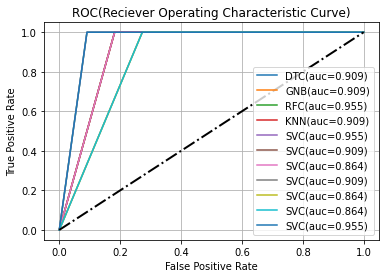

In [144]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

y=y_test

DTC_fpr,DTC_tpr,threshold=roc_curve(y,y_pred)
GNB_fpr,GNB_tpr,threshold=roc_curve(y,y2_pred)
RFC_fpr,RFC_tpr,threshold=roc_curve(y,y1_pred)
KNN_fpr,KNN_tpr,threshold=roc_curve(y,y4_pred)
SVC_fpr,SVC_tpr,threshold=roc_curve(y,y5_pred)
cbc_fpr,cbc_tpr,threshold=roc_curve(y,y6_pred)
mlp_fpr,mlp_tpr,threshold=roc_curve(y,y7_pred)
gb_fpr,gb_tpr,threshold=roc_curve(y,y8_pred)
ada_fpr,ada_tpr,threshold=roc_curve(y,y9_pred)
xgb_fpr,xgb_tpr,threshold=roc_curve(y,y10_pred)
xgbrfc_fpr,xgbrfc_tpr,threshold=roc_curve(y,y11_pred)

auc0=auc(DTC_fpr,DTC_tpr)
auc2=auc(GNB_fpr,GNB_tpr)
auc3=auc(RFC_fpr,RFC_tpr)
auc4=auc(KNN_fpr,KNN_tpr)
auc5=auc(SVC_fpr,SVC_tpr)
auc6=auc(cbc_fpr,cbc_tpr)
auc7=auc(gb_fpr,gb_tpr)
auc8=auc(mlp_fpr,mlp_tpr)
auc9=auc(ada_fpr,ada_tpr)
auc10=auc(xgb_fpr,xgb_tpr)
auc11=auc(xgbrfc_fpr,xgbrfc_tpr)

plt.plot(DTC_fpr,DTC_tpr,label='DTC(auc=%0.3f)'%auc0)
plt.plot(GNB_fpr,GNB_tpr,label='GNB(auc=%0.3f)'%auc2)
plt.plot(RFC_fpr,RFC_tpr,label='RFC(auc=%0.3f)'%auc3)
plt.plot(KNN_fpr,KNN_tpr,label='KNN(auc=%0.3f)'%auc4)
plt.plot(SVC_fpr,SVC_tpr,label='SVC(auc=%0.3f)'%auc5)
plt.plot(cbc_fpr,cbc_tpr,label='SVC(auc=%0.3f)'%auc6)
plt.plot(mlp_fpr,mlp_tpr,label='SVC(auc=%0.3f)'%auc7)
plt.plot(gb_fpr,gb_tpr,label='SVC(auc=%0.3f)'%auc8)
plt.plot(ada_fpr,ada_tpr,label='SVC(auc=%0.3f)'%auc9)
plt.plot(xgb_fpr,xgb_tpr,label='SVC(auc=%0.3f)'%auc10)
plt.plot(xgbrfc_fpr,xgbrfc_tpr,label='SVC(auc=%0.3f)'%auc11)

xl=np.linspace(0,1,num=10000)
yl=xl
plt.plot(xl,yl,linestyle='-.',lw=2,color='black')

plt.grid(True)
plt.title('ROC(Reciever Operating Characteristic Curve)',name='Courier')
plt.xlabel('False Positive Rate',name='Courier')
plt.ylabel('True Positive Rate',name='Sans')
plt.legend()
plt.show

print(DTC_fpr,DTC_tpr)
print(GNB_fpr,GNB_tpr)
print(RFC_fpr,RFC_tpr)
print(KNN_fpr,KNN_tpr)
print(SVC_fpr,SVC_tpr)
print(cbc_fpr,cbc_tpr)
print(mlp_fpr,mlp_tpr)
print(gb_fpr,gb_tpr)
print(ada_fpr,ada_tpr)
print(xgb_fpr,xgb_tpr)
print(xgbrfc_fpr,xgbrfc_tpr)
